In [4]:
import scalepy
import pandas as pd


target_spectra = scalepy.target_spectrum(0.6, 0.4, "ZC")
record_df = scalepy.select_records('5 6', '0 250', '0 50', 'Strike - Slip')
spectras_x = pd.read_csv('records_spectra_x.csv')


C:\Users\KaratasD\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [5]:
spectras_x = pd.read_csv('records_spectra_x.csv')

In [9]:
spectras_x

,Unnamed: 0,10,16,18,21,27,34,35,102,131,...,606,608,614,642,644,670,1748,1750,1754,1758
0,0,0.032610,0.065184,0.005207,0.065682,0.075144,0.405733,0.014179,0.232678,0.031645,...,0.222303,0.110235,0.284065,0.211533,0.061851,0.065665,0.316077,0.163475,0.198892,0.052170
1,1,0.048843,0.110031,0.007996,0.149428,0.106032,0.445390,0.020816,0.513365,0.053436,...,0.398651,0.228014,0.496387,0.360164,0.095469,0.119325,0.616965,0.206041,0.304113,0.092728
2,2,0.075952,0.163021,0.011120,0.119759,0.115586,0.489837,0.031395,0.419329,0.081988,...,0.351215,0.252672,0.778986,0.319292,0.155146,0.155400,0.709866,0.488361,0.422092,0.116266
3,3,0.067456,0.138583,0.011014,0.085711,0.169340,0.464457,0.033322,0.538626,0.050811,...,0.584193,0.253994,0.601399,0.526637,0.124487,0.244861,0.602331,0.538913,0.555665,0.209867
4,4,0.060131,0.162712,0.012218,0.121500,0.228186,0.348275,0.032457,0.511384,0.090987,...,0.420526,0.321681,0.400947,0.403324,0.147481,0.125688,0.520612,0.283468,0.551377,0.151439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,75,0.001899,0.004830,0.000251,0.003374,0.002285,0.004238,0.001260,0.005650,0.010655,...,0.002062,0.009993,0.007267,0.008799,0.002191,0.001634,0.003397,0.011068,0.009563,0.000737
76,76,0.001780,0.004590,0.000243,0.003404,0.002209,0.004124,0.001216,0.005504,0.009967,...,0.002019,0.009977,0.007011,0.008557,0.002130,0.001575,0.003283,0.010668,0.009333,0.000718
77,77,0.001671,0.004364,0.000236,0.003433,0.002140,0.004015,0.001157,0.005364,0.009171,...,0.001978,0.009903,0.006761,0.008326,0.002072,0.001514,0.003173,0.010343,0.009104,0.000701
78,78,0.001570,0.004153,0.000230,0.003450,0.002079,0.003911,0.001101,0.005230,0.008388,...,0.001938,0.009766,0.006519,0.008104,0.002016,0.001451,0.003068,0.010180,0.008877,0.000683


In [7]:
import numpy as np

dt = np.arange(0, 80*0.01, 0.01)

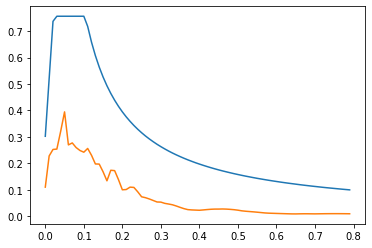

In [10]:
import matplotlib.pyplot as plt
plt.plot(dt, target_spectra['Sa'])
plt.plot(dt, spectras_x['608'])

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def select_records(magnitude_range, vs_range, rjb, fault_mechanism,target_spectra):

    ### Kayıtların seçilmesi ###

    ## Dosyaların okunması
    FlatFile_path_name = "C:\\Users\\KaratasD\\Desktop\\PRJ_2729\\EQE_Selection_Scaling\\3-psuedo\\flat_psuedo.xlsx"
    
    eqe_df = pd.read_excel(FlatFile_path_name)

    ## Inputların alınması
    min_m, max_m = [float(x) for x in magnitude_range.split()]
    min_vs, max_vs = [float(x) for x in vs_range.split()]
    min_d, max_d = [float(x) for x in rjb.split()]


    ## Inputlara gore kayitlarin filtrelenmesi #
    eqe_s = eqe_df[(eqe_df["Earthquake Magnitude"] > min_m) & (eqe_df["Earthquake Magnitude"] < max_m) 
                      & (eqe_df["Vs30 (m/s) selected for analysis"] > min_vs) & (eqe_df["Vs30 (m/s) selected for analysis"] < max_vs)
                      &  (eqe_df["EpiD (km)"] > min_d) & (eqe_df["EpiD (km)"] < max_d)]


    fay = fault_mechanism

    if fay == 'Strike - Slip' :
        eqe_selected = eqe_s[(eqe_s["Rake Angle (deg)"] > -180) & (eqe_s["Rake Angle (deg)"] < -150) | (eqe_s["Rake Angle (deg)"] > -30) & (eqe_s["Rake Angle (deg)"] < 30) | 
                         (eqe_s["Rake Angle (deg)"] > 150) & (eqe_s["Rake Angle (deg)"] < 180)]
    
    elif fay ==  'Normal' :
        eqe_selected = eqe_s[(eqe_s["Rake Angle (deg)"] > -120) & (eqe_s["Rake Angle (deg)"] < -60)]
                         
    elif fay ==  'Reverse' :
        eqe_selected = eqe_s[(eqe_s["Rake Angle (deg)"] > 60) & (eqe_s["Rake Angle (deg)"] < 120)]

    elif fay ==  'Reverse - Oblique' :
        eqe_selected = eqe_s[(eqe_s["Rake Angle (deg)"] > 30) & (eqe_s["Rake Angle (deg)"] < 60) | (eqe_s["Rake Angle (deg)"] > 120) & (eqe_s["Rake Angle (deg)"] < 150)]

    elif fay ==  'Normal - Oblique' :
        eqe_selected = eqe_s[(eqe_s["Rake Angle (deg)"] > -150) & (eqe_s["Rake Angle (deg)"] < -120) | (eqe_s["Rake Angle (deg)"] > -60) & (eqe_s["Rake Angle (deg)"] < -30)]

    else : 
        print("Invalid Mechanism!")
    
    
    ## Seçilen Kayıtların 11'e indirgenmesi ##
    
    # Dataframe'in kullanilmayan kolonlarinin dusuruldu ##
    eqe_selected.drop(eqe_selected.columns.difference(['Record Sequence Number', 'Earthquake Name', 
                                                 'File Name (Horizontal 1)', 'File Name (Horizontal 2)']), 1, inplace = True)
    # Kolon yeniden adlandirildi #                                             
    eqe_selected = eqe_selected.rename(columns={'Record Sequence Number': 'ID'})

    # Kullanilmayan dataframeler silindi #
    del eqe_s
    del eqe_df

    # Kayitlarin spektra database'inden okunmasi #
    x_records = pd.read_csv('records_spectra_x.csv')
    y_records = pd.read_csv('records_spectra_y.csv')
    # Index parametresi hataya sebep oldugu icin manuel olarak kolon silindi #
    del x_records['Unnamed: 0']
    del y_records['Unnamed: 0']

    # Kullanici girdisine gore secilen kayitlara gore, spektra database'i filtrelendi #
    x_records_filtered = x_records.loc[:, x_records.columns.isin(eqe_selected['ID'].astype(str).to_list())]
    y_records_filtered = y_records.loc[:, y_records.columns.isin(eqe_selected['ID'].astype(str).to_list())]

    # Ortogonallerin geometrik ortalamasi alinarak yeni bir datafarame olusturuldu #
    geo_mean_df = pd.DataFrame()

    for i in x_records_filtered.columns:
        geo_mean_df[i] = [(x*y)**(1/2) for x,y in zip(x_records_filtered[str(i)].to_list(), y_records_filtered[str(i)].to_list())]
    
    ## Geometrik ortalamanin hedef spektra ile karsilastirilarak en yakin 11 kaydin secilmesi ##
    differ_dict = {}

    for i in geo_mean_df.columns:
        differ_dict[i] = [abs(x-y) for x,y in zip(target_spectra['Sa'].to_list(), geo_mean_df[str(i)])]
    for i in geo_mean_df.columns:
        differ_dict[i] = max(differ_dict[i])
    key_list = []
    for key, value in differ_dict.items():
        if value in sorted(differ_dict.values())[:11]:
            key_list.append(key)
    final_x_records = x_records.loc[:, x_records.columns.isin(key_list)]
    final_y_records = y_records.loc[:, y_records.columns.isin(key_list)]
        

    
    return final_x_records, final_y_records


In [137]:
target_spectra = scalepy.target_spectrum(0.6, 0.4, "ZC")

In [161]:
    eqe_selected = select_records('5 6', '0 250', '0 50', 'Strike - Slip')
    # Kayitlarin spektra database'inden okunmasi #
    x_records = pd.read_csv('records_spectra_x.csv')
    y_records = pd.read_csv('records_spectra_y.csv')
    # Index parametresi hataya sebep oldugu icin manuel olarak kolon silindi #
    del x_records['Unnamed: 0']
    del y_records['Unnamed: 0']

    # Kullanici girdisine gore secilen kayitlara gore, spektra database'i filtrelendi #
    x_records_filtered = x_records.loc[:, x_records.columns.isin(eqe_selected['ID'].astype(str).to_list())]
    y_records_filtered = y_records.loc[:, y_records.columns.isin(eqe_selected['ID'].astype(str).to_list())]

    # Ortogonallerin geometrik ortalamasi alinarak yeni bir datafarame olusturuldu #
    geo_mean_df = pd.DataFrame()

    for i in x_records_filtered.columns:
        geo_mean_df[i] = [(x*y)**(1/2) for x,y in zip(x_records_filtered[str(i)].to_list(), y_records_filtered[str(i)].to_list())]
    
    ## Geometrik ortalamanin hedef spektra ile karsilastirilarak en yakin 11 kaydin secilmesi ##
    differ_dict = {}

    for i in geo_mean_df.columns:
        differ_dict[i] = [abs(x-y) for x,y in zip(target_spectra['Sa'].to_list(), geo_mean_df[str(i)])]
    for i in geo_mean_df.columns:
        differ_dict[i] = max(differ_dict[i])
    key_list = []
    for key, value in differ_dict.items():
        if value in sorted(differ_dict.values())[:11]:
            key_list.append(key)
    final_x_records = x_records.loc[:, x_records.columns.isin(key_list)]
    final_y_records = y_records.loc[:, y_records.columns.isin(key_list)]

C:\Users\KaratasD\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [163]:
final_y_records

,10,16,21,27,102,314,315,317,319,499,1748
0,0.030323,0.079425,0.046260,0.076749,0.044372,0.273059,0.223499,0.321619,0.535001,0.133652,0.247281
1,0.041667,0.091315,0.084161,0.109841,0.090883,0.499037,0.354175,0.453690,0.765745,0.254358,0.436432
2,0.061502,0.200705,0.106206,0.136723,0.097811,0.601976,0.342413,0.486315,0.704658,0.241590,0.511731
3,0.059967,0.266957,0.107497,0.132216,0.115794,0.290560,0.537682,0.549898,0.945774,0.304289,0.599308
4,0.060885,0.207033,0.076517,0.193351,0.069749,0.250088,0.287084,0.573572,1.089348,0.220299,0.800702
...,...,...,...,...,...,...,...,...,...,...,...
75,0.005809,0.004634,0.005286,0.005986,0.001016,0.001899,0.003293,0.013751,0.059674,0.005243,0.007697
76,0.005725,0.004482,0.004970,0.005886,0.000979,0.001851,0.003206,0.013465,0.058732,0.005131,0.007416
77,0.005543,0.004335,0.004656,0.005780,0.000943,0.001806,0.003122,0.013166,0.057721,0.005023,0.007149
78,0.005307,0.004194,0.004348,0.005667,0.000909,0.001762,0.003040,0.012857,0.056640,0.004916,0.006895


In [158]:
key_list

['10', '16', '21', '27', '102', '314', '315', '317', '319', '499', '1748']

In [168]:
import scalepy

#target_spectra = scalepy.target_spectrum(0.6, 0.4, "ZC")
x_lst, y_lst = scalepy.select_records('5 6', '0 250', '0 50', 'Strike - Slip', scalepy.target_spectrum(0.6, 0.4, "ZC"))


TypeError: select_records() takes 4 positional arguments but 5 were given